In [1]:
import tensorflow as tf
import math, os, sys
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:
import zipfile

local_zip = 'dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/')
zip_ref.close()

In [3]:
TRAINING_DIR = "/dataset/Train"
TEST_DIR = "/dataset/Test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # val 20%

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                               target_size=(160, 160), 
                                               color_mode='rgb',
                                               batch_size=16, 
                                               class_mode='categorical', 
#                                                shuffle=True,
                                               subset = 'training') 

validation_generator = validation_datagen.flow_from_directory(TRAINING_DIR, 
                                           target_size=(160, 160),
                                           color_mode='rgb',
                                           batch_size=16, 
                                           class_mode='categorical',
#                                            shuffle=False,
                                           subset = 'validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                        target_size=(160, 160), 
                                        color_mode='rgb',
                                        batch_size=16,
#                                         shuffle=False,
                                        class_mode='categorical')


Found 768 images belonging to 6 classes.
Found 192 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [4]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Boletus(Beracun)
1 : Boletus(Konsumsi)
2 : Ganoderma(Beracun)
3 : Ganoderma(Konsumsi)
4 : Russula(Beracun)
5 : Russula(Konsumsi)


In [5]:
# import numpy as np

# fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))
# idx = 0

# for i in range(2):
#     for j in range(4):
#         label = labels[np.argmax(train_generator[0][1][idx])]
#         ax[i, j].set_title(f"{label}")
#         ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
#         ax[i, j].axis("off")
#         idx += 1

# plt.tight_layout()
# plt.suptitle("Sample Training Images", fontsize=21)
# plt.show()

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True 

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
#         tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')
    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [8]:
opt = tf.keras.optimizers.Adam()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=200, validation_data=validation_generator)

Epoch 1/200
48/48 [==============================] - 63s 1s/step - loss: 1.8370 - accuracy: 0.1810 - val_loss: 1.7696 - val_accuracy: 0.1927
Epoch 2/200
48/48 [==============================] - 46s 968ms/step - loss: 1.7155 - accuracy: 0.2474 - val_loss: 1.5643 - val_accuracy: 0.3333
Epoch 3/200
48/48 [==============================] - 46s 965ms/step - loss: 1.6293 - accuracy: 0.3333 - val_loss: 1.4642 - val_accuracy: 0.4062
Epoch 4/200
48/48 [==============================] - 45s 932ms/step - loss: 1.5678 - accuracy: 0.3737 - val_loss: 1.2868 - val_accuracy: 0.5833
Epoch 5/200
48/48 [==============================] - 70s 1s/step - loss: 1.4697 - accuracy: 0.4245 - val_loss: 1.0602 - val_accuracy: 0.6354
Epoch 6/200
48/48 [==============================] - 74s 2s/step - loss: 1.3196 - accuracy: 0.4818 - val_loss: 0.9628 - val_accuracy: 0.6302
Epoch 7/200
48/48 [==============================] - 70s 1s/step - loss: 1.2621 - accuracy: 0.5143 - val_loss: 1.1138 - val_accuracy: 0.5625
Epoc

48/48 [==============================] - 69s 1s/step - loss: 0.2653 - accuracy: 0.9062 - val_loss: 0.8134 - val_accuracy: 0.8333
Epoch 116/200
48/48 [==============================] - 68s 1s/step - loss: 0.2871 - accuracy: 0.8971 - val_loss: 0.9035 - val_accuracy: 0.8021
Epoch 117/200
48/48 [==============================] - 68s 1s/step - loss: 0.2809 - accuracy: 0.9062 - val_loss: 1.5367 - val_accuracy: 0.7708
Epoch 118/200
48/48 [==============================] - 74s 2s/step - loss: 0.2023 - accuracy: 0.9297 - val_loss: 1.2689 - val_accuracy: 0.7917
Epoch 119/200
48/48 [==============================] - 73s 2s/step - loss: 0.2436 - accuracy: 0.9167 - val_loss: 1.0856 - val_accuracy: 0.7969
Epoch 120/200
48/48 [==============================] - 70s 1s/step - loss: 0.2062 - accuracy: 0.9310 - val_loss: 0.5697 - val_accuracy: 0.8542
Epoch 121/200
48/48 [==============================] - 69s 1s/step - loss: 0.2553 - accuracy: 0.9219 - val_loss: 1.3395 - val_accuracy: 0.7344
Epoch 122/200

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

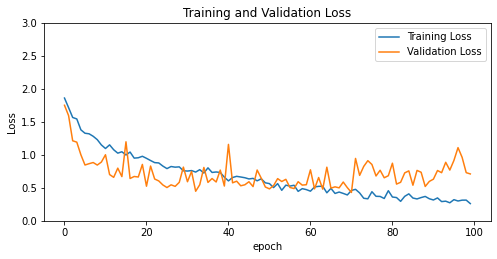

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right') 
plt.ylabel('Loss')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

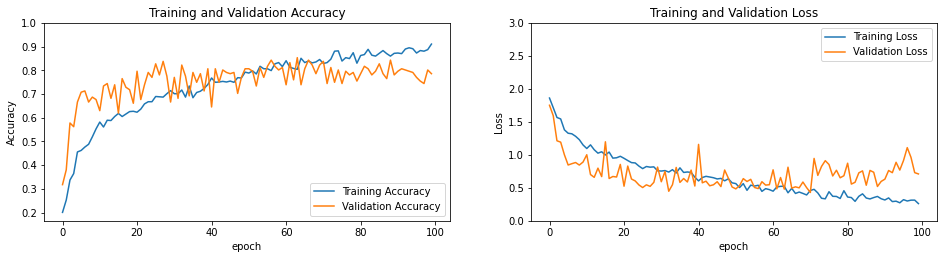

In [26]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [27]:
# # ave model as h5
model.save("model/model_91_86_100_32_2.h5")

In [33]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

8/8 - 4s - loss: 1.2444 - accuracy: 0.7375 - 4s/epoch - 455ms/step
Test accuracy: 0.737500011920929


In [29]:
# Buat prediksi untuk dataset test
import numpy as np

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
true = test_generator.classes

8/8 [==============================] - 10s 510ms/step


In [30]:
predictions = np.argmax(model.predict(test_generator), axis = -1)
predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_generator.classes,predictions,target_names=['Boletus (Beracun)','Boletus (Konsumsi)', 'Ganoderma(Beracun)', 'Ganoderma(Konsumsi)', 'Russula(Beracun)','Russula(Konsumsi)']))

8/8 [==============================] - 4s 517ms/step
                     precision    recall  f1-score   support

  Boletus (Beracun)       0.67      0.82      0.74        40
 Boletus (Konsumsi)       0.54      0.85      0.66        40
 Ganoderma(Beracun)       0.91      0.78      0.84        40
Ganoderma(Konsumsi)       0.82      0.70      0.76        40
   Russula(Beracun)       0.88      0.90      0.89        40
  Russula(Konsumsi)       0.79      0.38      0.51        40

           accuracy                           0.74       240
          macro avg       0.77      0.74      0.73       240
       weighted avg       0.77      0.74      0.73       240



Confusion matrix


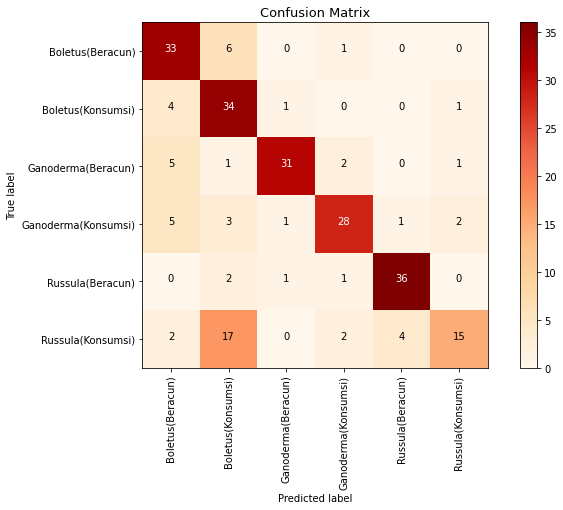

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.OrRd):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    #print(cm)
    plt.rcParams['figure.figsize'] = (10.0, 7.0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 13)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_generator.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_generator.class_indices)